In [1]:
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import librosa
from sklearn.model_selection import cross_val_score, StratifiedKFold


In [2]:
df = pd.read_csv("./train_data.csv")

In [3]:
columns = df.columns
columns

Index(['file_name', 'f0_mean', 'f0_std', 'centroid_mean', 'zcr_mean', 'gender',
       'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13',
       'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18', 'mfcc_19'],
      dtype='object')

In [4]:
df.head()

,file_name,f0_mean,f0_std,centroid_mean,zcr_mean,gender,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19
0,7159862176919548258.wav,135.841,24.243,740.331,0.051,male,103.231,0.718,25.404,2.038,...,-2.244,-2.243,2.965,-1.824,-4.525,1.500,-1.237,-4.069,-0.350,0.058
1,12951848363959320156.wav,226.774,55.770,909.476,0.076,female,96.974,-15.822,15.120,1.485,...,-3.464,-3.024,-3.933,-7.882,-6.139,-4.840,-5.367,-4.021,-5.124,-4.504
2,13394269605176372148.wav,139.675,21.848,772.593,0.055,male,114.748,-14.526,22.125,4.573,...,-2.132,-2.240,0.303,0.591,-2.711,-0.399,-1.099,-2.443,0.833,-0.418
3,17562067154452877054.wav,134.990,30.237,1161.595,0.100,male,80.935,-13.851,27.127,2.626,...,-0.790,-0.487,0.231,1.541,-1.264,-1.111,-2.147,-2.543,-1.438,-2.024
4,9431791451113209518.wav,210.459,45.223,1007.198,0.082,female,82.219,-10.313,16.970,-8.001,...,-2.607,-4.120,-2.175,-7.199,-2.702,-2.136,-4.509,-1.698,-5.956,-5.325


In [5]:
X = df.loc[:,['f0_mean', 'f0_std', 'centroid_mean', 'zcr_mean',
       'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7',
       'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12', 'mfcc_13',
       'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18', 'mfcc_19']]

In [6]:
X.head()

,f0_mean,f0_std,centroid_mean,zcr_mean,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,...,mfcc_10,mfcc_11,mfcc_12,mfcc_13,mfcc_14,mfcc_15,mfcc_16,mfcc_17,mfcc_18,mfcc_19
0,135.841,24.243,740.331,0.051,103.231,0.718,25.404,2.038,-1.094,5.204,...,-2.244,-2.243,2.965,-1.824,-4.525,1.500,-1.237,-4.069,-0.350,0.058
1,226.774,55.770,909.476,0.076,96.974,-15.822,15.120,1.485,-14.470,0.921,...,-3.464,-3.024,-3.933,-7.882,-6.139,-4.840,-5.367,-4.021,-5.124,-4.504
2,139.675,21.848,772.593,0.055,114.748,-14.526,22.125,4.573,-4.208,3.750,...,-2.132,-2.240,0.303,0.591,-2.711,-0.399,-1.099,-2.443,0.833,-0.418
3,134.990,30.237,1161.595,0.100,80.935,-13.851,27.127,2.626,0.885,1.593,...,-0.790,-0.487,0.231,1.541,-1.264,-1.111,-2.147,-2.543,-1.438,-2.024
4,210.459,45.223,1007.198,0.082,82.219,-10.313,16.970,-8.001,-14.741,-10.973,...,-2.607,-4.120,-2.175,-7.199,-2.702,-2.136,-4.509,-1.698,-5.956,-5.325


In [7]:
y = df.loc[:,"gender"]

In [8]:
y.head()

0      male
1    female
2      male
3      male
4    female
Name: gender, dtype: object

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [11]:
y_test.head()

383     female
2509    female
2772      male
2958    female
2846      male
Name: gender, dtype: object

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# --- Load your data and define X and y ---
# df = pd.read_csv(...) 
# X = df.drop('gender', axis=1)
# y = df['gender']

# --- Set up the Cross-Validation Strategy ---
# We will use 10 folds. This means the model will be trained and evaluated 10 times.
# Each time, 90% of the data is for training and 10% is for testing.
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# --- Create Models within Pipelines ---
# Using a pipeline is CRUCIAL. It ensures that for each fold, the StandardScaler
# is re-fit ONLY on that fold's training data, preventing data leakage.

# Create a dictionary of models to test
models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(random_state=42)),
    'KNN': make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5)),
    'Decision Tree': make_pipeline(StandardScaler(), DecisionTreeClassifier(random_state=42)),
    'SVM': make_pipeline(StandardScaler(), SVC(random_state=42))
}

# --- Run the Cross-Validation for each model ---
results = {}
for model_name, model in models.items():
    # 'cross_val_score' will run the entire K-fold process
    scores = cross_val_score(model, X, y, cv=kfold, scoring='f1_macro')
    results[model_name] = scores
    print(f"{model_name} | F1 Scores: {np.round(scores, 3)}")
    print(f"{model_name} | Mean F1 Score: {scores.mean():.4f} (+/- {scores.std():.4f})")
    print("-" * 30)

Logistic Regression | F1 Scores: [1.    1.    1.    0.997 0.997 0.997 1.    0.993 1.    1.   ]
Logistic Regression | Mean F1 Score: 0.9984 (+/- 0.0022)
------------------------------
KNN | F1 Scores: [1.    1.    1.    1.    1.    0.997 1.    0.997 1.    1.   ]
KNN | Mean F1 Score: 0.9993 (+/- 0.0013)
------------------------------
Decision Tree | F1 Scores: [0.977 0.987 0.977 0.987 0.987 0.997 0.984 0.99  0.997 0.99 ]
Decision Tree | Mean F1 Score: 0.9873 (+/- 0.0064)
------------------------------
SVM | F1 Scores: [1.    1.    1.    1.    1.    1.    1.    0.997 1.    1.   ]
SVM | Mean F1 Score: 0.9997 (+/- 0.0010)
------------------------------


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
scaler.fit(X_train)

StandardScaler()

In [16]:
X_train_scaled = scaler.transform(X_train)

In [17]:
X_train_scaled

array([[-0.89488615, -0.16091699,  0.66984028, ...,  0.79935375,
         0.37717744,  1.1688593 ],
       [-1.30529959, -1.24102299, -1.06858414, ..., -0.02346527,
         1.15923839,  0.13754544],
       [ 1.63638129,  0.69531641, -0.60975514, ..., -0.32168727,
        -1.14213648, -1.70444194],
       ...,
       [ 0.78750574,  0.8532322 ,  0.60357306, ...,  0.78966011,
         0.19009257, -0.92639443],
       [-0.08783639,  0.82507372,  0.41700738, ...,  0.35458671,
         0.77398214,  1.21586288],
       [-1.08990834, -1.89234638, -1.35661551, ...,  1.11810346,
         2.04615925,  0.781218  ]], shape=(2446, 23))

In [18]:
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
encoder = LabelEncoder()

In [21]:
y_train_encoded = encoder.fit_transform(y_train)

In [22]:
y_test_encoded = encoder.transform(y_test)

In [23]:
y_test_encoded

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()

In [26]:
lr.fit(X_train_scaled,y_train_encoded)

LogisticRegression()

In [27]:
y_pred = lr.predict(X_test_scaled)

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

In [29]:
print(classification_report(y_test_encoded,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       306

    accuracy                           1.00       612
   macro avg       1.00      1.00      1.00       612
weighted avg       1.00      1.00      1.00       612



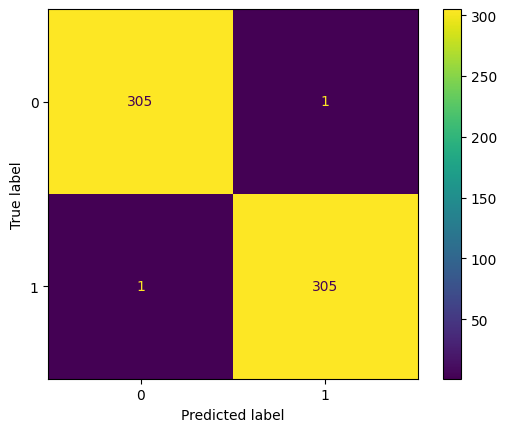

In [30]:
con_mat = ConfusionMatrixDisplay.from_estimator(lr,X_test_scaled,y_test_encoded)
plt.show()

In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train_scaled,y_train_encoded)

y_pred = knn.predict(X_test_scaled)


print(classification_report(y_pred=y_pred,y_true=y_test_encoded))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       306

    accuracy                           1.00       612
   macro avg       1.00      1.00      1.00       612
weighted avg       1.00      1.00      1.00       612



In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train_scaled,y_train_encoded)

y_pred = dtc.predict(X_test_scaled)


print(classification_report(y_pred=y_pred,y_true=y_test_encoded))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       306
           1       0.99      0.98      0.99       306

    accuracy                           0.99       612
   macro avg       0.99      0.99      0.99       612
weighted avg       0.99      0.99      0.99       612



In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train_scaled,y_train_encoded)

y_pred = rfc.predict(X_test_scaled)


print(classification_report(y_pred=y_pred,y_true=y_test_encoded))



              precision    recall  f1-score   support

           0       0.99      1.00      0.99       306
           1       1.00      0.99      0.99       306

    accuracy                           0.99       612
   macro avg       0.99      0.99      0.99       612
weighted avg       0.99      0.99      0.99       612



In [34]:
from sklearn.svm import SVC


svc = SVC()


svc.fit(X_train_scaled,y_train_encoded)

y_pred = svc.predict(X_test_scaled)


print(classification_report(y_pred=y_pred,y_true=y_test_encoded))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       306

    accuracy                           1.00       612
   macro avg       1.00      1.00      1.00       612
weighted avg       1.00      1.00      1.00       612



In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X_train_scaled,y_train_encoded)

y_pred = gbc.predict(X_test_scaled)


print(classification_report(y_pred=y_pred,y_true=y_test_encoded))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       306
           1       1.00      0.98      0.99       306

    accuracy                           0.99       612
   macro avg       0.99      0.99      0.99       612
weighted avg       0.99      0.99      0.99       612



In [36]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=1)

mlp.fit(X_train_scaled,y_train_encoded)

y_pred = mlp.predict(X_test_scaled)


print(classification_report(y_pred=y_pred,y_true=y_test_encoded))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       306
           1       1.00      0.99      1.00       306

    accuracy                           1.00       612
   macro avg       1.00      1.00      1.00       612
weighted avg       1.00      1.00      1.00       612



In [37]:
#constansts

LOW_CUTOFF = 80 #HZ
HIGH_CUTOFF = 3000 #HZ
ORDER = 4 #order of the filter

SAMPLING_RATE:int = 16000

In [38]:
sos = sp.signal.butter(ORDER, [LOW_CUTOFF, HIGH_CUTOFF], btype='band', analog=False, output='sos', fs=SAMPLING_RATE)

In [39]:
def feature_extraction(audio_path) -> np.array:
    y:np.array;
    sr:int;
    y,sr = librosa.load(audio_path,sr=16000,mono=True);
    y = sp.signal.sosfilt(sos,y)
    f0_yin = librosa.yin(y, fmin=80, fmax=400, sr=sr);
    centroid = librosa.feature.spectral_centroid(y=y, sr=sr);
    mfcc = librosa.feature.mfcc(
    y=y, sr=sr,
    n_mfcc=20,           # number of mfcc coefficients
    n_fft=512,          # fft window size
    hop_length=128,      # Step between frames
    n_mels=40,           # number of mel filters
    );
    mfcc = mfcc[1:,:]

    mfccs = {f"mfcc_{i}":round(val.mean(),3) for i,val in enumerate(mfcc,start=1)}

    zcr = librosa.feature.zero_crossing_rate(y, frame_length=512, hop_length=128);

    features:list = [f0_yin.mean(),f0_yin.std(),centroid.mean(),zcr.mean()]
    features.extend(mfccs.values())

    return np.array(features)

In [58]:
from IPython.display import Audio
aud = "/home/pujan/D/projects/dsp/data/speech-dramatic-female-38105.mp3"

Audio(aud,rate=SAMPLING_RATE)

In [59]:
features = feature_extraction(aud)

In [60]:
features

array([ 2.78244151e+02,  8.14508760e+01,  1.21083107e+03,  1.03899464e-01,
        6.81000000e+01, -2.99310000e+01,  1.37180000e+01, -8.50400000e+00,
       -1.19750000e+01, -5.66500000e+00, -1.33370000e+01, -5.61600000e+00,
       -6.96000000e+00, -9.38000000e+00, -8.71700000e+00, -6.68700000e+00,
       -5.97900000e+00, -6.28000000e+00, -4.26000000e+00, -1.98300000e+00,
        7.26000000e-01,  9.59000000e-01,  7.30000000e-02])

In [61]:
features = features.reshape(1,-1)

In [62]:
features

array([[ 2.78244151e+02,  8.14508760e+01,  1.21083107e+03,
         1.03899464e-01,  6.81000000e+01, -2.99310000e+01,
         1.37180000e+01, -8.50400000e+00, -1.19750000e+01,
        -5.66500000e+00, -1.33370000e+01, -5.61600000e+00,
        -6.96000000e+00, -9.38000000e+00, -8.71700000e+00,
        -6.68700000e+00, -5.97900000e+00, -6.28000000e+00,
        -4.26000000e+00, -1.98300000e+00,  7.26000000e-01,
         9.59000000e-01,  7.30000000e-02]])

In [63]:
features_scaled = scaler.transform(features)

/home/pujan/D/projects/dsp/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [64]:
y_predicted = mlp.predict(features_scaled)

In [65]:
y_predicted

array([0])